# 09_04: comparing variables

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

Plotting two variables together helps us identify possible relations between them. Do they rise and fall together? It is possible that changes in one may cause, or be caused by changes in the other?

We often pick one column in the dataset as the **explanatory variable**, and see if (indeed) it explains the variation in a **response variable**.

Let us once again load the gapminder dataset.

In [2]:
gm = pd.read_csv('gapminder2.csv')

In [3]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41822 entries, 0 to 41821
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           41822 non-null  object 
 1   year              41822 non-null  int64  
 2   region            41822 non-null  object 
 3   population        41822 non-null  float64
 4   life_expectancy   40629 non-null  float64
 5   age5_surviving    40490 non-null  float64
 6   babies_per_woman  41822 non-null  float64
 7   gdp_per_capita    41822 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.6+ MB


For timestamped data, the simplest thing to do is to plot a variable using the date as the explanatory variable---that is, plot a **time series**. For instance, we could use the population of my country of origin, Italy.

In [4]:
italy = gm.query('country == "Italy"')

pandas can plot one variable against another with `plot.scatter`.

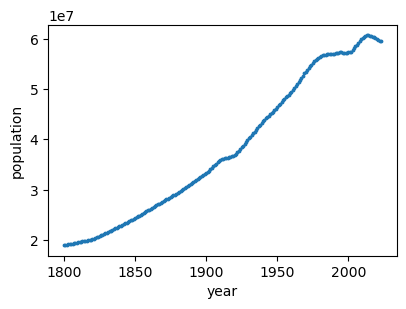

In [5]:
italy.plot.scatter(x='year', y='population', s=3, figsize=(4.5,3));
# alternative call: italy.plot(kind='scatter', x='year', y='population', s=5, figsize=(4.5,3));

The rate of change of the population not change very much across two centuries. The same plot would be very different for China, or India, after 1950.

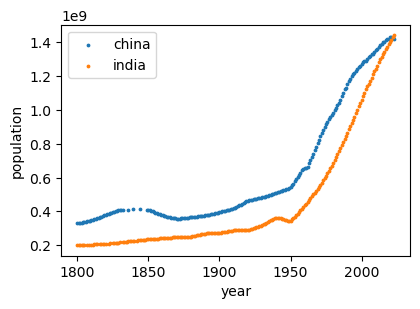

In [6]:
axes = gm.query('country == "China"').plot.scatter(x='year', y='population', label='china', c='C0', s=3, figsize=(4.5,3))
gm.query('country == "India"').plot.scatter(x='year', y='population', label='india', c='C1', s=3, ax=axes); # reuse figure

Going back to Italy, let's look at income per person per day, in 2017 equivalent dollars, again as a time series. We look at the logarithm of income.  One can see WWII, and in the top corner, COVID10. The last 20 years have been rather disappointing.

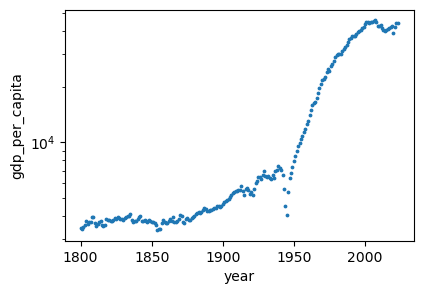

In [7]:
italy.plot.scatter('year', 'gdp_per_capita', logy=True, s=3, figsize=(4.5,3));

What if we plot log income against a variable related to quality of life, such as life expectancy?

We see that they are generally correlated, with some turnarounds. We can get a better sense of those by adding color, driven by year. Whenever you use color to communicate information, you should be mindful of colorblindness. The matplotlib colormap `viridis` was designed to be safe for various types of color deficiencies.

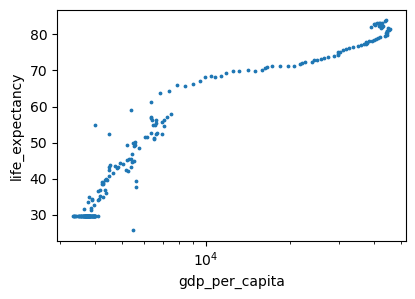

In [8]:
italy.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=3, figsize=(4.5,3));

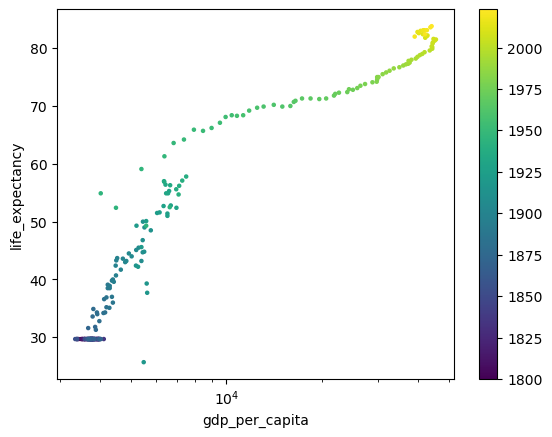

In [9]:
italy.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, c=italy.year, colormap='viridis', s=5);

Plotting a time series of life expectancy confirms that the dips happened with WWI and WWII, with a much smaller dips in 2020 with covid 19.

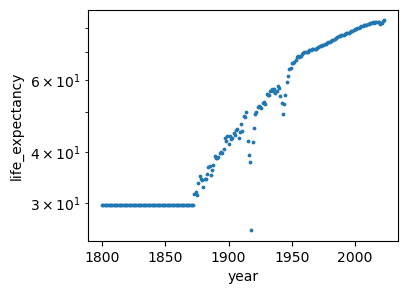

In [10]:
italy.plot.scatter('year', 'life_expectancy', logy=True, s=3, figsize=(4,3));

skip: [If we throw in the U.S., we see that the progress of the two countries is similar, with the U.S. consistently richer, but also less healthy on average. Here I have manually added labels for the two traces.]

In [66]:
# usa = gm.query('country == "USA"')

# axes = italy.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, c=italy.year, colormap='viridis', s=3)
# usa.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=3, c=usa.year, colormap='viridis', colorbar=False, ax=axes)

# pp.annotate('Italy', (8000, 70)); pp.annotate('USA', (18000, 60));

Plots on a monitor or on paper are intrinsically two-dimensional, and it's hard to go beyond showing two variables, although we have already used changing colors to denote years.

In addition to x position, y position, and color, we can also use the size of markers, their shape, their contour, and perhaps their texture to encode information.

So let's broaden our consideration to the entire world, pick a year, and plot income, life expectancy, and population using the size of the markers. The size argument specifies the area in points squared, so we need to scale the population column appropriately.

In [12]:
gm2015 = gm[gm.year == 2015]

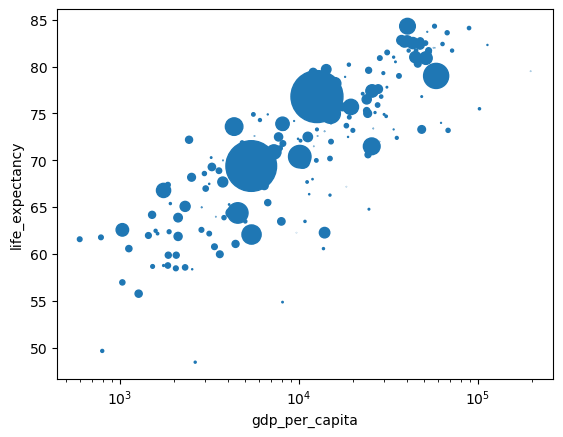

In [13]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population);

To make this a bit clearer, we set a white contour for the markers.

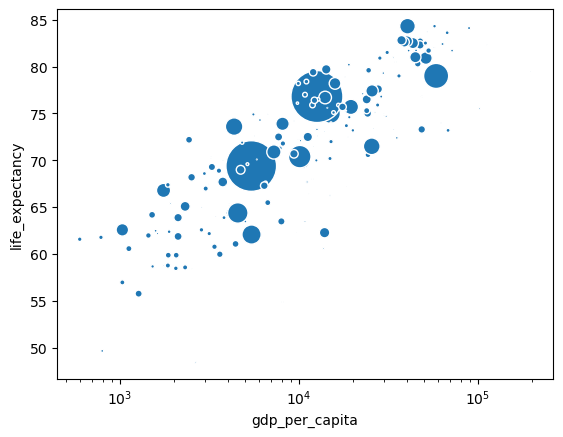

In [14]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                    edgecolor='w');

Let's see... we could use color to distinguish between continents. For that we need to map the `region` column to a color name, and pass the resulting pandas Series to scatter.

In [15]:
continent = gm2015.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral', 'Oceania': 'teal'})
continent

199          coral
423           gold
647        skyblue
858           gold
1082       skyblue
           ...    
40960    palegreen
41183        coral
41381        coral
41605      skyblue
41813      skyblue
Name: region, Length: 195, dtype: object

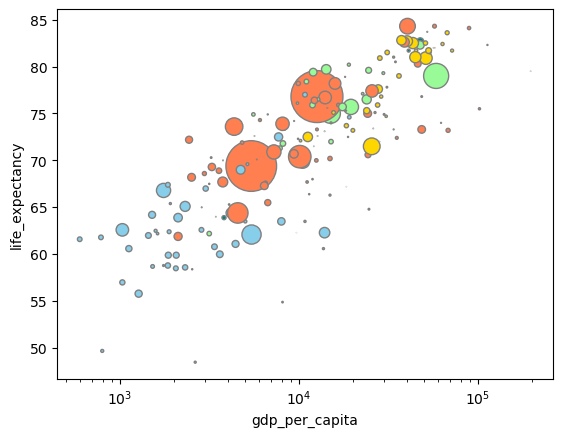

In [16]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                    c=continent, edgecolor='gray');

Last, we'll emphasize a single country by changing the edge color.

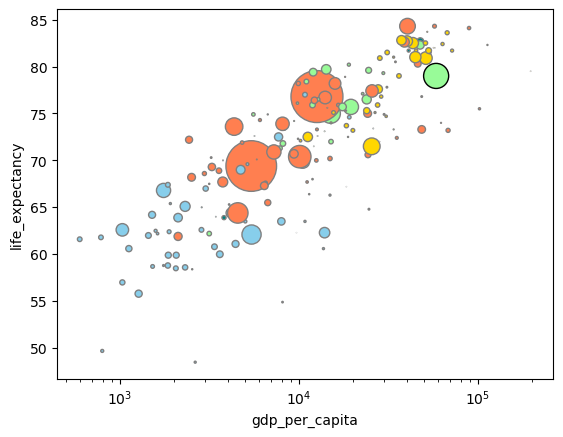

In [54]:
gm2015.plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                    c=continent, edgecolor=np.where(gm2015.country == "USA", 'black', 'gray'));

This is very promising. We can animate this plot across the years by creating a function that takes a year as argument, and passing it to a Jupyter _widget_. In this case we will use a simple slider ranging from 1950 to 2023, and a dropdown selector for a few countries.

In [62]:
def plotyear(year, country):
    gm[gm.year == year].plot.scatter(x='gdp_per_capita', y='life_expectancy', logx=True, s=1e-6 * gm2015.population,
                                     c=continent, edgecolor=np.where(gm2015.country == country, 'black', 'gray'));
    pp.axis(xmin=200, xmax=200000, ymin=0, ymax=90); # fix the plotting ranges

In [63]:
from ipywidgets import interactive, widgets

In [65]:
interactive_plot = interactive(plotyear,
                               year=widgets.IntSlider(min=1950, max=2023, step=1, value=1950),
                               country=widgets.Dropdown(options=['USA', 'China', 'India']))

# workaround to avoid jumping output
interactive_plot.children[-1].layout.height = '400px'
interactive_plot

interactive(children=(IntSlider(value=1950, description='year', max=2023, min=1950), Dropdown(description='cou…

The progress of all countries is evident, in income, life expectancy, and child mortality; but especially so for Asia, which now hosts more than half of the world's population.

Using the slider shows that interactivity is one further element that we can exploit to visualize data effectively. Once we introduce plotting solutions based on JavaScript, we'll see how that interactivity can be pushed even further.